<a href="https://colab.research.google.com/github/vicky1412/Predicting_stocks_using_deep_learning-using-realtime-/blob/main/real_time_1m_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
pip install alpha_vantage

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')

## Create API object

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange

API_Key = 'GICCCRW4PJWT0C9'
ts = ForeignExchange(key=API_Key,output_format='pandas')

## Load the Model

In [ ]:
Filename = "/content/drive/MyDrive/Option Trading/options-trading-classification-model.pkl"  
with open(Filename, 'rb') as file:  
    model = pickle.load(file)

## Create API object

In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange

API_Key = 'GICCCRW4PJWT0C9'
ts = ForeignExchange(key=API_Key,output_format='pandas')

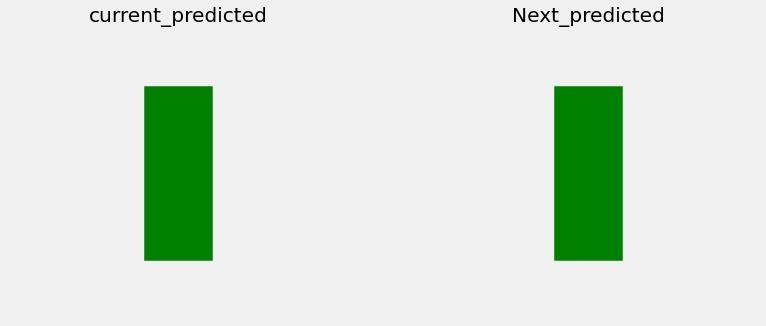

In [ ]:
data = ts.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD', interval='1min', outputsize='full')[0]
# Rename the columns
data.rename(columns = {'1. open':'Open'}, inplace = True)
data.rename(columns = {'2. high':'High'}, inplace = True)
data.rename(columns = {'3. low':'Low'}, inplace = True)
data.rename(columns = {'4. close':'Close'}, inplace = True)
# set Index
data['Index'] = np.arange(len(data))
data.set_index('Index',inplace=True)
# Add Candle column
def colors(row):
  if row['Open'] < row['Close']:
    return 1
  elif row['Open'] > row['Close']:
    return 0
  else:
    return -1
data['Candle'] = data.apply (lambda row: colors(row), axis=1)
# Target (Candle)
dfcandle = data.filter(['Candle'])
# extract last 60 
# reverse it
last_60_1m_candle = dfcandle[0:60]
last_60_1m_candle = last_60_1m_candle.iloc[::-1]
# set Index
last_60_1m_candle['Index'] = np.arange(len(last_60_1m_candle))
last_60_1m_candle.set_index('Index',inplace=True)

dataset = last_60_1m_candle.values
x = []
x.append(dataset[0:60])
x = np.array(x)
x = np.reshape(x,(x.shape[0],x.shape[1]))
final_data = pd.DataFrame(x)
# Predict
predictions_current = model.predict(final_data)

next = final_data
next.pop(0)
next[60] = predictions_current[0]

predictions_next = model.predict(next)

# Virtualize
fig, ax = plt.subplots(1,2,figsize=(12,5))
# Title
ax[0].set(title="current_predicted", xlabel="Height", ylabel="Width")
ax[1].set(title="Next_predicted", xlabel="Height", ylabel="Width")
# X and Y limit
ax[0].set_xlim(0,5)
ax[0].set_ylim(0,5)
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,5)
# hide grid
ax[0].grid(False)
ax[1].grid(False)
# hide axis
ax[0].axis('off')
ax[1].axis('off')

def rects(axx,ayy,width,height,cancolor):
  rect = matplotlib.patches.Rectangle((axx, ayy),width, height,color =cancolor)
  return rect

#current_predict
if predictions_current[0] == 1:
  rect = rects(2,1,1,3,'green')
  ax[0].add_patch(rect)
elif predictions_current[0] == 0:
  rect = rects(2,1,1,3,'red')
  ax[0].add_patch(rect)
else:
  rect = rects(2,1,1,3,'black')
  ax[0].add_patch(rect)
# next_predict
if predictions_next[0] == 1:
  rect = rects(2,1,1,3,'green')
  ax[1].add_patch(rect)
elif predictions_next[0] == 0:
  rect = rects(2,1,1,3,'red')
  ax[1].add_patch(rect)
else:
  rect = rects(2,1,1,3,'black')
  ax[1].add_patch(rect)

